In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
def load_data(filename):
    with open(filename) as input_file:
        return json.load(input_file)

In [16]:
def plot_data(filename, poll_period):
    controller_data = load_data(filename)

    time = [x * poll_period for x in range(len(controller_data))]
    zeros = [0]*len(controller_data)
    two_fifty_five = [255]*len(controller_data)
    neg_two_fifty_five = [-255]*len(controller_data)
    min_eff_speed = [controller_data[0]['data']['controller']['config']['minEffSpeed']]*len(controller_data)
    max_eff_speed = [controller_data[0]['data']['controller']['config']['maxEffSpeed']]*len(controller_data)
    neg_min_eff_speed = [-x for x in min_eff_speed]
    neg_max_eff_speed = [-x for x in max_eff_speed]

    error = [controller_data[x]['data']['controller']['state']['error'] for x in range(len(controller_data))]
    previous_error = [controller_data[x]['data']['controller']['state']['previousError'] for x in range(len(controller_data))]

    control_output = [controller_data[x]['data']['controller']['state']['controlOutput'] for x in range(len(controller_data))]

    target_left_motor_velocity = [controller_data[x]['data']['controller']['state']['leftMotorVelocity'] for x in range(len(controller_data))]
    target_right_motor_velocity = [controller_data[x]['data']['controller']['state']['rightMotorVelocity'] for x in range(len(controller_data))]

    left_reflectance = [controller_data[x]['data']['reflectance']['left']['value'] for x in range(len(controller_data))]
    right_reflectance = [controller_data[x]['data']['reflectance']['right']['value'] for x in range(len(controller_data))]

    actual_left_motor_velocity = []
    actual_right_motor_velocity = []
    for datum in controller_data:
        left_motor_speed = datum['data']['motors']['left']['speed']
        right_motor_speed = datum['data']['motors']['right']['speed']
        left_motor_velocity = left_motor_speed if datum['data']['motors']['left']['direction'] == 0 else -left_motor_speed
        right_motor_velocity = right_motor_speed if datum['data']['motors']['right']['direction'] == 0 else -right_motor_speed
        actual_left_motor_velocity.append(left_motor_velocity)
        actual_right_motor_velocity.append(right_motor_velocity)

    plt.rcParams["figure.figsize"] = (30,30)
    fig, axs = plt.subplots(5)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    plt.rcParams.update({'font.size': 20})
    fig.suptitle('Line Follower Controller Data from ' + filename)

    axs[0].set_title('Left and Right Reflectance Values Vs. Time')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Reflectance')
    axs[0].plot(time, left_reflectance, label='left')
    axs[0].plot(time, right_reflectance, label='right')
    axs[0].legend(loc='upper right')

    axs[1].set_title('\"error\" and \"previousError\" Vs. Time')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Error')
    axs[1].plot(time, zeros, '--', color='black')
    axs[1].plot(time, error, label='error')
    axs[1].plot(time, previous_error, label='previousError')
    axs[1].legend(loc='upper right')

    axs[2].set_title('\"controlOutput\" Vs. Time')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Control Output')
    axs[2].plot(time, zeros, '--', color='black')
    axs[2].plot(time, control_output)

    axs[3].set_title('Target Motor Velocities Vs. Time')
    axs[3].set_xlabel('Time (s)')
    axs[3].set_ylabel('Velocity')
    axs[3].plot(time, zeros, '--', color='black')
    axs[3].plot(time, max_eff_speed, '--', color='red')
    axs[3].plot(time, min_eff_speed, '--', color='green')
    axs[3].plot(time, neg_min_eff_speed, '--', color='green')
    axs[3].plot(time, neg_max_eff_speed, '--', color='red')
    axs[3].plot(time, target_left_motor_velocity, label='left')
    axs[3].plot(time, target_right_motor_velocity, label='right')
    axs[3].legend(loc='upper right')

    axs[4].set_title('Actual Motor Velocities Vs. Time')
    axs[4].set_xlabel('Time (s)')
    axs[4].set_ylabel('Velocity')
    axs[4].plot(time, zeros, '--', color='black')
    axs[4].plot(time, max_eff_speed, '--', color='red')
    axs[4].plot(time, min_eff_speed, '--', color='green')
    axs[4].plot(time, neg_min_eff_speed, '--', color='green')
    axs[4].plot(time, neg_max_eff_speed, '--', color='red')
    axs[4].plot(time, actual_left_motor_velocity, label='left')
    axs[4].plot(time, actual_right_motor_velocity, label='right')
    axs[4].legend(loc='upper right')

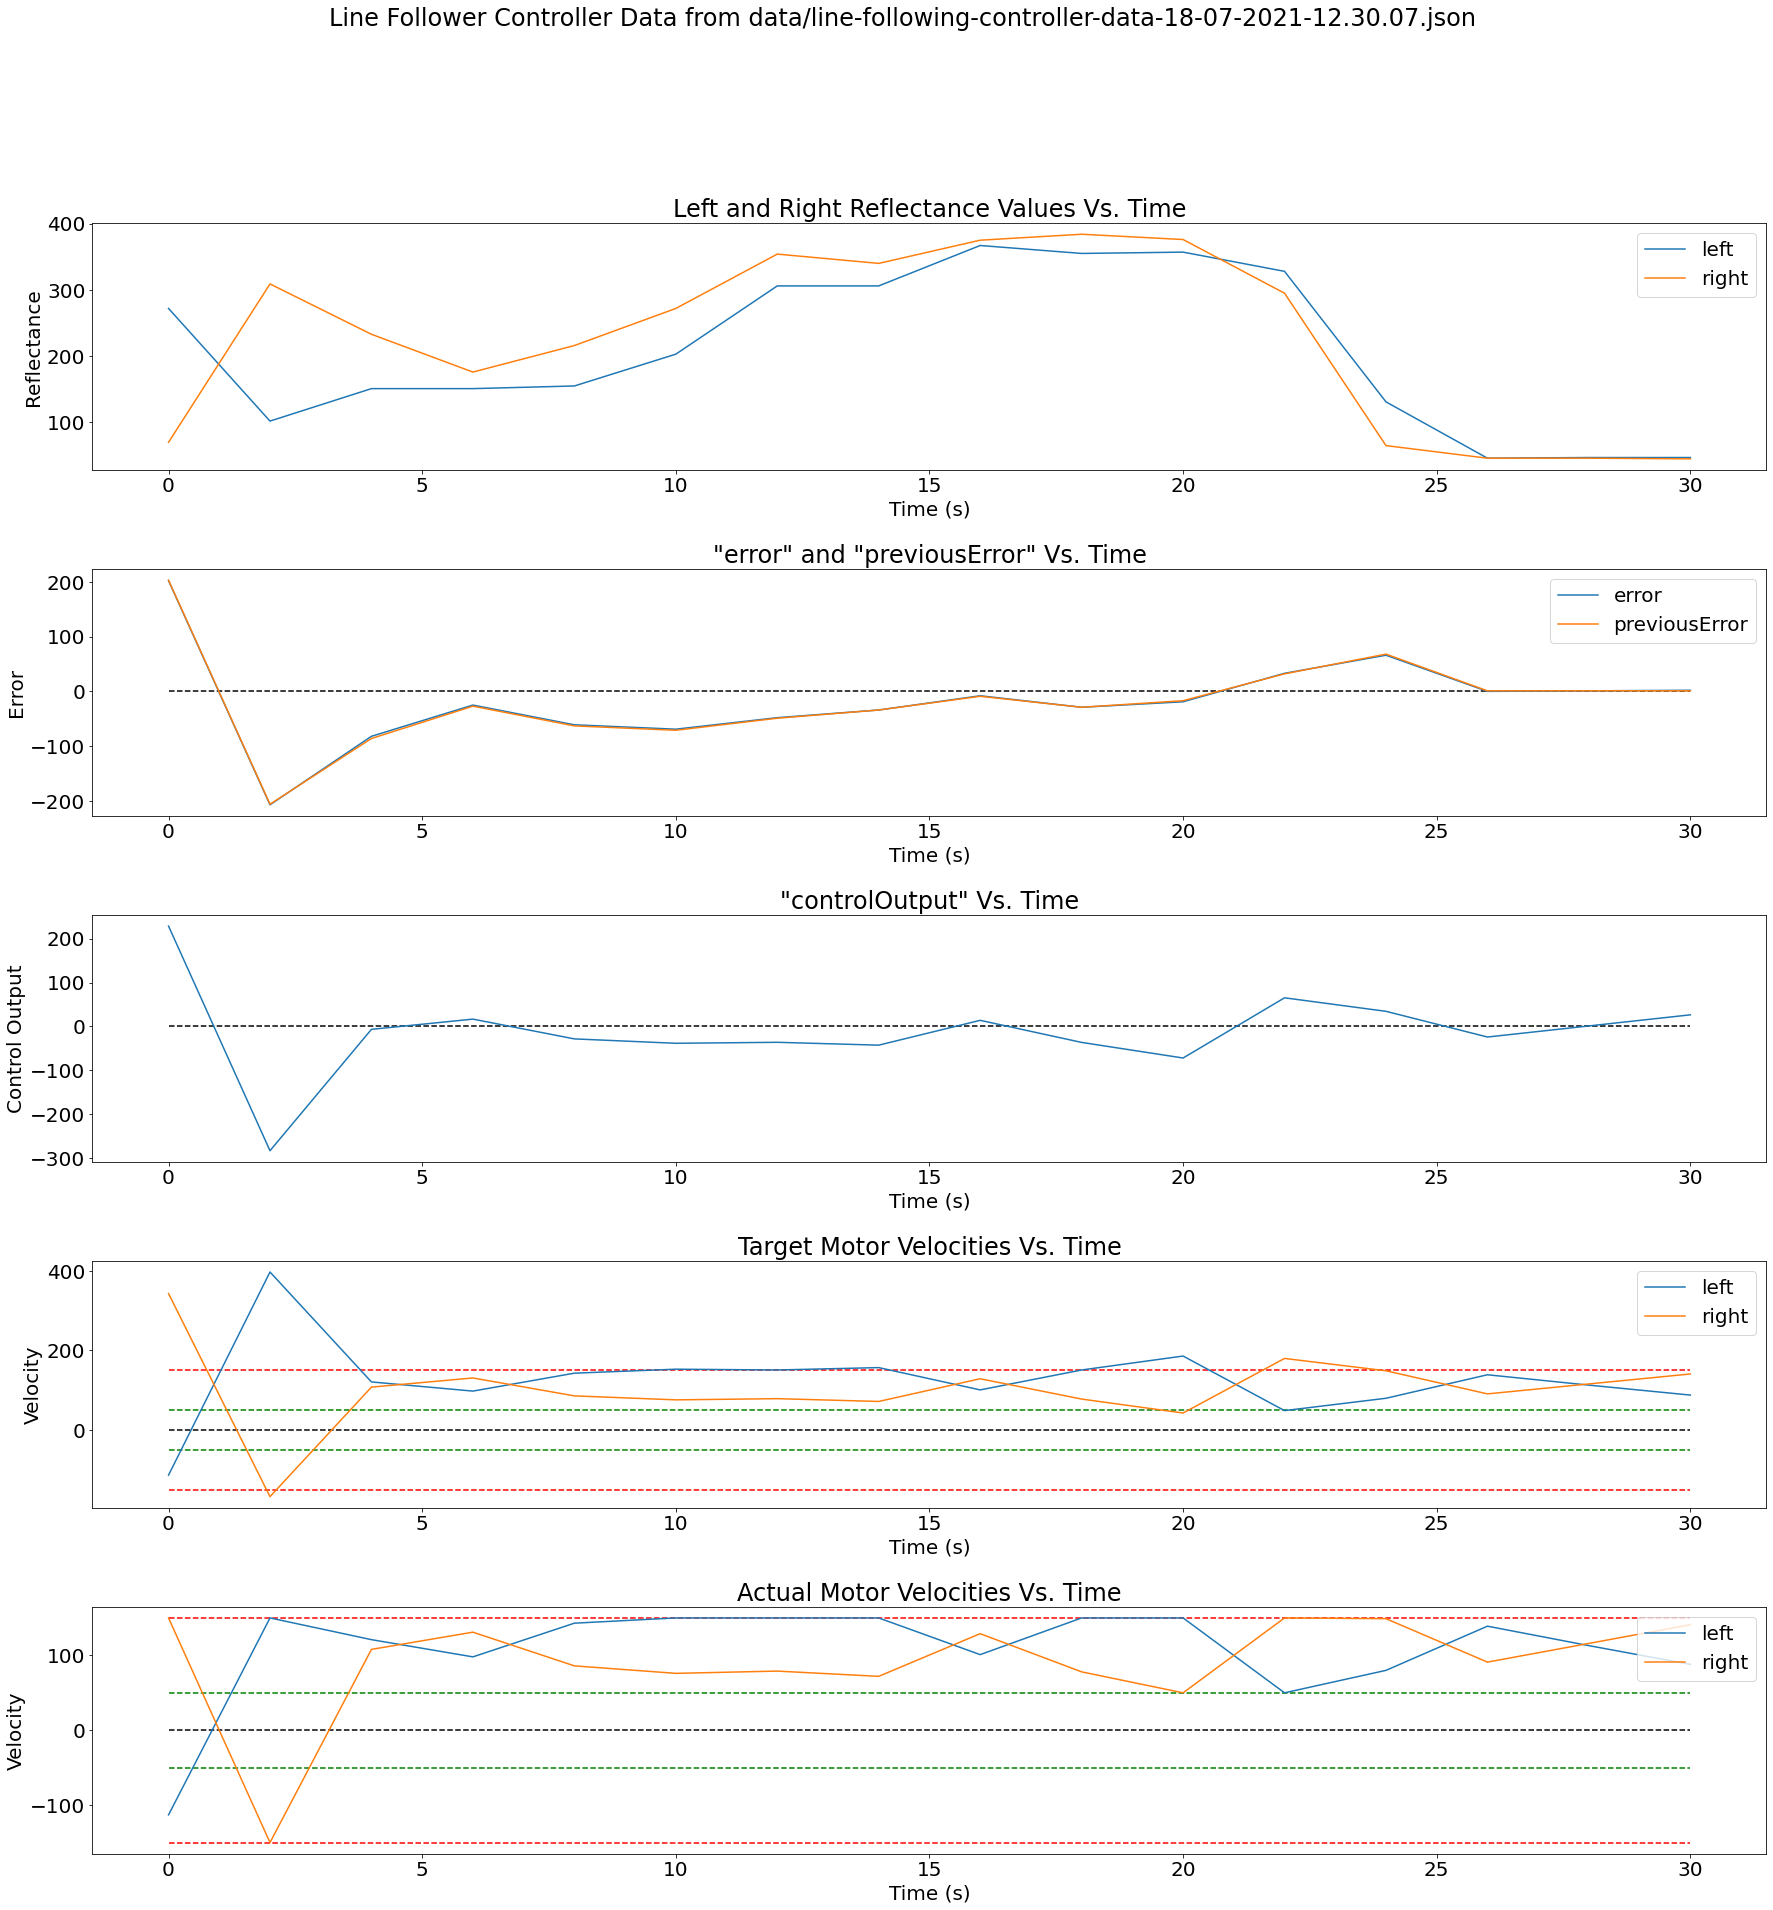

In [17]:
plot_data('data/line-following-controller-data-18-07-2021-12.30.07.json', 2)